## Contents

- <span style="color:blue">[Import Necessary Modules](#import-necessary-modules)</span>
- <span style="color:blue">[Load Data](#load-data)</span>
- <span style="color:blue">[Data Preprocessing](#data-preprocessing)</span>
- <span style="color:blue">[Model Training](#model-training)</span>
- <span style="color:blue">[Feature Importance Extraction](#feature-importance-extraction)</span>
- <span style="color:blue">[Model Serialization](#model-serialization)</span>


In [2]:
import sys
sys.path.append('../scripts')

In [3]:
from SalesPredictor import DataPreprocessor, ModelBuilder, ModelSerializer

In [4]:
import pandas as pd
df = pd.read_csv('C:/Users/ibsan/Desktop/TenX/week-4/Data/store_train_clean_data.csv')
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.75
1,2,5,6064,625,1,1,0,1,2015,7,...,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",92.0,64.50
2,3,5,8314,821,1,1,0,1,2015,7,...,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",103.0,52.25
3,4,5,13995,1498,1,1,0,1,2015,7,...,c,620.0,9.0,2009.0,0,0.0,0.0,0,70.0,24187.75
4,5,5,4822,559,1,1,0,1,2015,7,...,a,29910.0,4.0,2015.0,0,0.0,0.0,0,3.0,24187.75


In [5]:
# Preprocess the data and train the model
processed_df = DataPreprocessor.preprocess_data(df)
processed_df.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,SalePerCustomer,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen,Weekday,IsWeekend,DaysToNextHoliday,DaysSinceLastHoliday,MonthPart
0,1,5,5263,555,1,1,0,1,31,9.482883,...,0.0,0.0,0,82.0,24187.75,4,0,-1,0,End
1,2,5,6064,625,1,1,0,1,31,9.702400,...,13.0,2010.0,"Jan,Apr,Jul,Oct",92.0,64.50,4,0,-1,0,End
2,3,5,8314,821,1,1,0,1,31,10.126675,...,14.0,2011.0,"Jan,Apr,Jul,Oct",103.0,52.25,4,0,-1,0,End
3,4,5,13995,1498,1,1,0,1,31,9.342457,...,0.0,0.0,0,70.0,24187.75,4,0,-1,0,End
4,5,5,4822,559,1,1,0,1,31,8.626118,...,0.0,0.0,0,3.0,24187.75,4,0,-1,0,End


In [17]:
processed_df.columns


Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'WeekOfYear', 'SalePerCustomer',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpen', 'PromoOpen', 'Weekday', 'IsWeekend',
       'DaysToNextHoliday', 'DaysSinceLastHoliday', 'MonthPart'],
      dtype='object')

In [6]:
# Train the model
model = ModelBuilder.train_model(processed_df)

Mean Squared Error: 337964.91


In [14]:
# Get the actual feature names after preprocessing
preprocessor = model.named_steps['preprocessor']

# Check the feature names for numeric and categorical transformations
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]

print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")



Numeric features: ['Customers', 'CompetitionDistance', 'CompetitionOpen', 'PromoOpen']
Categorical features: ['StateHoliday', 'StoreType', 'Assortment', 'MonthPart']


In [15]:
# Print the number of features in the model
importances = model.named_steps['regressor'].feature_importances_
print(f"Number of features in model: {len(importances)}")


Number of features in model: 16


Feature Importances:
                Feature  Importance
0             Customers    0.709771
1   CompetitionDistance    0.118221
9           StoreType_d    0.054906
2       CompetitionOpen    0.037911
3             PromoOpen    0.037598
11         Assortment_b    0.015905
12         Assortment_c    0.005149
10         Assortment_a    0.004826
7           StoreType_b    0.004801
6           StoreType_a    0.003212


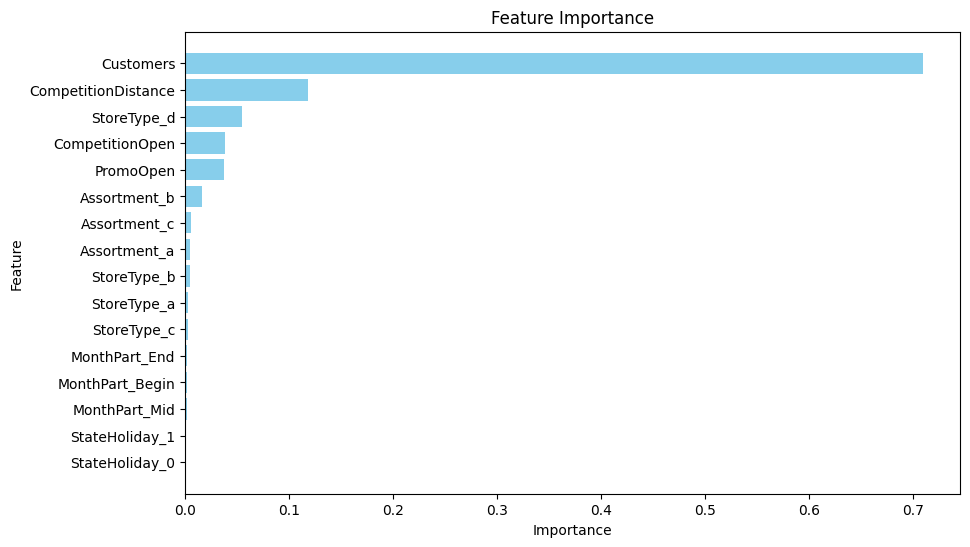

In [19]:
def get_feature_names(model):
    # Get the feature names after preprocessing
    feature_names = model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out()
    numeric_features = ['Customers', 'CompetitionDistance', 'CompetitionOpen', 'PromoOpen']
    return numeric_features + feature_names.tolist()

feature_names = get_feature_names(model)
ModelBuilder.get_feature_importance(model, feature_names)


In [20]:
# Save the model to a custom path
save_directory = "C:/Users/ibsan/Desktop/TenX/week-4/saved_models"
ModelSerializer.serialize_model(model, save_directory)

Model saved as C:/Users/ibsan/Desktop/TenX/week-4/saved_models\model_2025-01-06-21-47-05.pkl
